In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('diabetes.csv')
data

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data.columns=['pregnancies','glucose','bloodpressure','skinthickness','insulin','bmi','diabetes_pedigree_function','age','outcome']
data

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [5]:
data.isnull().sum()

pregnancies                   0
glucose                       0
bloodpressure                 0
skinthickness                 0
insulin                       0
bmi                           0
diabetes_pedigree_function    0
age                           0
outcome                       0
dtype: int64

In [6]:
data.describe()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetes_pedigree_function,age,outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
x=data.loc[:,['pregnancies','glucose','bloodpressure']]
y=data.iloc[:,-1]

In [8]:
x

,pregnancies,glucose,bloodpressure
0,1,85,66
1,8,183,64
2,1,89,66
3,0,137,40
4,5,116,74
...,...,...,...
762,10,101,76
763,2,122,70
764,5,121,72
765,1,126,60


In [9]:
y

0      0
1      1
2      0
3      1
4      0
      ..
762    0
763    0
764    0
765    1
766    0
Name: outcome, Length: 767, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=24)

In [12]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(613, 3)
(154, 3)
(613,)
(154,)


In [13]:
#model input
model = Sequential()
model.add(Input(3)) #input_layer
model.add(Dense(units=8,activation='relu')) #hl1 with relu activation
model.add(Dense(units=1,activation='sigmoid'))

In [14]:
#model_compilation
model.compile(optimizer=SGD(learning_rate=0.05),loss='binary_crossentropy',metrics='accuracy')

In [15]:
model.fit(x=x_train,y=y_train,epochs=100,batch_size=10,validation_data=(x_test,y_test))

Epoch 1/100
62/62 [==============================] - 3s 12ms/step - loss: 3.8935 - accuracy: 0.6444 - val_loss: 0.6638 - val_accuracy: 0.6299
Epoch 2/100
62/62 [==============================] - 0s 4ms/step - loss: 0.6573 - accuracy: 0.6542 - val_loss: 0.6591 - val_accuracy: 0.6299
Epoch 3/100
62/62 [==============================] - 0s 4ms/step - loss: 0.6477 - accuracy: 0.6525 - val_loss: 0.6594 - val_accuracy: 0.6299
Epoch 4/100
62/62 [==============================] - 0s 4ms/step - loss: 0.6462 - accuracy: 0.6558 - val_loss: 0.6603 - val_accuracy: 0.6299
Epoch 5/100
62/62 [==============================] - 0s 4ms/step - loss: 0.6439 - accuracy: 0.6574 - val_loss: 0.6605 - val_accuracy: 0.6299
Epoch 6/100
62/62 [==============================] - 0s 4ms/step - loss: 0.6464 - accuracy: 0.6574 - val_loss: 0.6603 - val_accuracy: 0.6299
Epoch 7/100
62/62 [==============================] - 0s 4ms/step - loss: 0.6441 - accuracy: 0.6558 - val_loss: 0.6610 - val_accuracy: 0.6299
Epoch 8/100


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 32        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


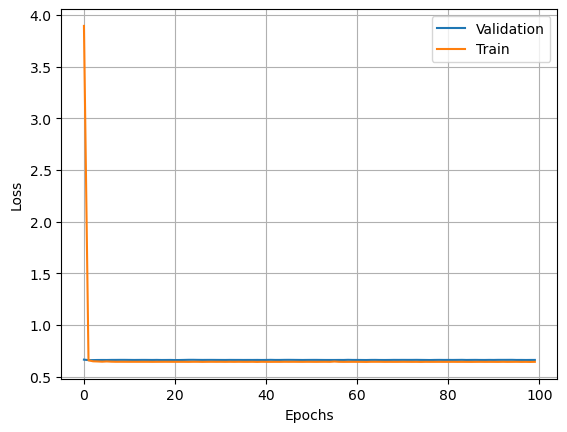

In [17]:
history = model.history.history
val_loss = history["val_loss"]
val_acc =  history["val_accuracy"]
train_loss = history["loss"]
train_acc= history["accuracy"]


plt.plot(val_loss)
plt.plot(train_loss)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Validation", "Train"])
plt.grid()
plt.show()

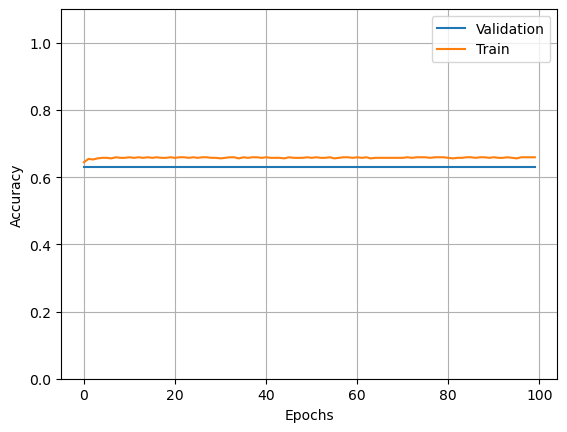

In [18]:
plt.plot(val_acc)
plt.plot(train_acc)
plt.ylim(0,1.1)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Validation", "Train"])
plt.grid()
plt.show()

In [19]:
y_pred = model.predict(x_test)

5/5 [==============================] - 0s 0s/step


In [20]:
accuracy = model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 4ms/step - loss: 0.6609 - accuracy: 0.6299


# model2

In [21]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [22]:
x

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetes_pedigree_function,age
0,1,85,66,29,0,26.6,0.351,31
1,8,183,64,0,0,23.3,0.672,32
2,1,89,66,23,94,28.1,0.167,21
3,0,137,40,35,168,43.1,2.288,33
4,5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63
763,2,122,70,27,0,36.8,0.340,27
764,5,121,72,23,112,26.2,0.245,30
765,1,126,60,0,0,30.1,0.349,47


In [23]:
y

0      0
1      1
2      0
3      1
4      0
      ..
762    0
763    0
764    0
765    1
766    0
Name: outcome, Length: 767, dtype: int64

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=24)

In [25]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(613, 8)
(154, 8)
(613,)
(154,)


In [26]:
#model input
model = Sequential()
model.add(Input(8)) #input_layer
model.add(Dense(units=16,activation='relu')) #hl1 with relu activation
model.add(Dense(units=16,activation='relu')) #hl2 with relu activation
model.add(Dense(units=16,activation='relu')) #hl3with relu activation
model.add(Dense(units=1,activation='sigmoid'))#output layer

In [27]:
#model_compilation
model.compile(optimizer=Adam(learning_rate=0.05),loss='binary_crossentropy',metrics='accuracy')

In [28]:
model.fit(x=x_train,y=y_train,epochs=150,batch_size=10,validation_data=(x_test,y_test))

Epoch 1/150
62/62 [==============================] - 2s 10ms/step - loss: 0.9380 - accuracy: 0.6493 - val_loss: 0.6697 - val_accuracy: 0.6299
Epoch 2/150
62/62 [==============================] - 0s 4ms/step - loss: 0.6404 - accuracy: 0.6574 - val_loss: 0.6637 - val_accuracy: 0.6299
Epoch 3/150
62/62 [==============================] - 0s 5ms/step - loss: 0.6482 - accuracy: 0.6574 - val_loss: 0.6713 - val_accuracy: 0.6299
Epoch 4/150
62/62 [==============================] - 0s 5ms/step - loss: 0.6481 - accuracy: 0.6574 - val_loss: 0.6670 - val_accuracy: 0.6299
Epoch 5/150
62/62 [==============================] - 0s 5ms/step - loss: 0.6456 - accuracy: 0.6574 - val_loss: 0.6629 - val_accuracy: 0.6299
Epoch 6/150
62/62 [==============================] - 0s 4ms/step - loss: 0.6437 - accuracy: 0.6574 - val_loss: 0.6597 - val_accuracy: 0.6299
Epoch 7/150
62/62 [==============================] - 0s 5ms/step - loss: 0.6473 - accuracy: 0.6574 - val_loss: 0.6593 - val_accuracy: 0.6299
Epoch 8/150


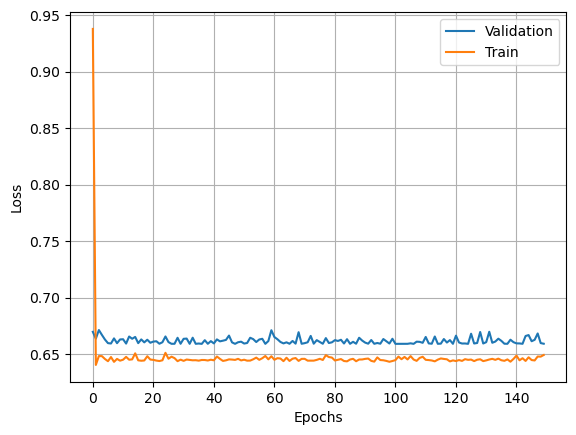

In [29]:
history = model.history.history
val_loss = history["val_loss"]
val_acc =  history["val_accuracy"]
train_loss = history["loss"]
train_acc= history["accuracy"]


plt.plot(val_loss)
plt.plot(train_loss)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Validation", "Train"])
plt.grid()
plt.show()

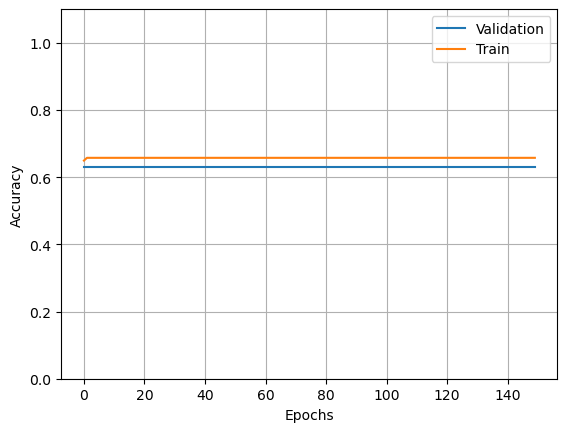

In [30]:
plt.plot(val_acc)
plt.plot(train_acc)
plt.ylim(0,1.1)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Validation", "Train"])
plt.grid()
plt.show()